In [1]:
# CPSC483 Programming Assignment
# Ethan Trinh
# ektrinh@csu.fullerton.edu

In [2]:
# Python Version 3.10.6
import numpy as np # Numpy 1.24.2
import pandas as pd # Pandas 1.5.3
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt # Matplotlib 3.7.0
from matplotlib.colors import ListedColormap

In [3]:
# Import and reorder CSV file
# Row 0 was skipped because row 0 was the row label

df = pd.read_csv('HappinessData-1.csv', skiprows=[0], names=['Unhappy/Happy', 'City Services Availability', 'Housing Cost', 
                                                            'Quality of schools', 'Community trust in local police', 
                                                            'Community Maintenance', 'Availability of Community Room'])
df


,Unhappy/Happy,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room
0,1,5,3,3.0,3.0,5,3
1,0,5,3,3.0,3.0,5,3
2,0,4,3,3.0,3.0,4,4
3,0,4,1,3.0,4.0,4,5
4,1,3,2,4.0,4.0,4,5
...,...,...,...,...,...,...,...
135,1,4,3,3.0,3.0,3,4
136,0,3,4,3.0,3.0,2,3
137,1,3,3,3.0,5.0,5,5
138,1,3,3,1.0,3.0,3,4


In [4]:
# Process data for any NaN
# First locate all NaN in dataset
nan_row = df[df.isnull().any(axis=1)]
nan_row

,Unhappy/Happy,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room
5,1,3,2,4.0,NaN,4,5
18,1,5,3,4.0,NaN,4,5
27,1,4,3,NaN,4.0,3,4
31,1,5,3,NaN,5.0,4,5


In [5]:
# Calculate Mean and Median of each column
# Analyze data and figure out best value to fill NaN
print(df.mean(numeric_only=True))
print("\n")
print(df.median(numeric_only=True))

Unhappy/Happy                      0.535714
City Services Availability         4.321429
Housing Cost                       2.542857
Quality of schools                 3.253623
Community trust in local police    3.695652
Community Maintenance              3.600000
Availability of Community Room     4.221429
dtype: float64


Unhappy/Happy                      1.0
City Services Availability         5.0
Housing Cost                       3.0
Quality of schools                 3.0
Community trust in local police    4.0
Community Maintenance              4.0
Availability of Community Room     4.0
dtype: float64


In [6]:
# Looking at the data, Mean, Median and Mode are all close enough to each other
# Replace NaN with Median, because unlike Mean (Median is a whole number and is based on frequency)

df = df.fillna(df.median())

# Check for nan rows 1 more time
nan_row2 = df[df.isnull().any(axis=1)]
nan_row2

,Unhappy/Happy,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room


In [7]:
# Remove Duplicate rows in the data
# First find all of the duplicated rows

duplicateRows = df[df.duplicated()]
duplicateRows

,Unhappy/Happy,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room
5,1,3,2,4.0,4.0,4,5
9,1,5,3,4.0,3.0,4,5
23,1,5,1,3.0,3.0,4,4
24,1,5,1,3.0,3.0,4,4
26,1,5,2,4.0,3.0,4,5
36,1,5,2,4.0,4.0,5,5
39,1,4,1,3.0,4.0,4,4
45,1,4,3,3.0,4.0,3,4
64,0,4,1,3.0,4.0,4,3
75,1,5,5,5.0,5.0,5,5


In [8]:
df.drop_duplicates(inplace=True)
df

,Unhappy/Happy,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room
0,1,5,3,3.0,3.0,5,3
1,0,5,3,3.0,3.0,5,3
2,0,4,3,3.0,3.0,4,4
3,0,4,1,3.0,4.0,4,5
4,1,3,2,4.0,4.0,4,5
...,...,...,...,...,...,...,...
134,1,5,1,2.0,5.0,2,4
135,1,4,3,3.0,3.0,3,4
136,0,3,4,3.0,3.0,2,3
137,1,3,3,3.0,5.0,5,5


In [9]:
# Unhappy/Happy is the class label: as per specifications, move the class label to the last column
# Save reference to column
class_label = df['Unhappy/Happy']
class_label

0      1
1      0
2      0
3      0
4      1
      ..
134    1
135    1
136    0
137    1
138    1
Name: Unhappy/Happy, Length: 124, dtype: int64

In [10]:
# drop class label column
df.drop('Unhappy/Happy', axis=1, inplace=True)
df

,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room
0,5,3,3.0,3.0,5,3
1,5,3,3.0,3.0,5,3
2,4,3,3.0,3.0,4,4
3,4,1,3.0,4.0,4,5
4,3,2,4.0,4.0,4,5
...,...,...,...,...,...,...
134,5,1,2.0,5.0,2,4
135,4,3,3.0,3.0,3,4
136,3,4,3.0,3.0,2,3
137,3,3,3.0,5.0,5,5


In [11]:
# add new column to end of table
df['Unhappy/Happy'] = class_label
df

,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room,Unhappy/Happy
0,5,3,3.0,3.0,5,3,1
1,5,3,3.0,3.0,5,3,0
2,4,3,3.0,3.0,4,4,0
3,4,1,3.0,4.0,4,5,0
4,3,2,4.0,4.0,4,5,1
...,...,...,...,...,...,...,...
134,5,1,2.0,5.0,2,4,1
135,4,3,3.0,3.0,3,4,1
136,3,4,3.0,3.0,2,3,0
137,3,3,3.0,5.0,5,5,1


In [12]:
x = df.loc[:, ['City Services Availability', 'Housing Cost', 'Quality of schools', 'Community trust in local police',
               'Community Maintenance', 'Availability of Community Room']].values

In [13]:
y = df.loc[:, 'Unhappy/Happy'].values

In [14]:
# Split the dataframe to training set and dataset.
# Using an 80% - 20% split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X_train, Y_train):
        self.x_train = X_train
        self.y_train = Y_train
        
    # Calculates the distance between two points
    def euclidian_distance(self, x_test_point, x_training_point):
        
        distance = np.sum((x_test_point - x_training_point)**2)
        return np.sqrt(distance)
        
    def predict(self, x_test):
        predictions = [self._predict(x) for x in x_test]    
        return predictions
        
    def _predict(self, x_test):
        
        
        distances = [self.euclidian_distance(x_test, x_train_point) for x_train_point in self.x_train]

        # Find nearest k
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]      
        
        # Find most common label
        most_common = Counter(k_labels).most_common()
        return most_common[0][0]
        

In [16]:
# Make nearest_neighbors class object
nearest_neighbors = KNN(k=5)
nearest_neighbors.fit(x_train, y_train)

my_prediction = nearest_neighbors.predict(x_test)

print(my_prediction)
print(y_test)

[1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0]
[1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0]


In [17]:
print (classification_report(y_test, my_prediction))
print (confusion_matrix(y_test, my_prediction))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.60      0.75      0.67        12

    accuracy                           0.64        25
   macro avg       0.65      0.64      0.64        25
weighted avg       0.65      0.64      0.64        25

[[7 6]
 [3 9]]


In [18]:
# Test against sklearn
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

print(y_predict)
print(y_test)

[1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0]
[1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0]


In [19]:
print (classification_report(y_test, y_predict))
print (confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61        13
           1       0.60      0.75      0.67        12

    accuracy                           0.64        25
   macro avg       0.65      0.64      0.64        25
weighted avg       0.65      0.64      0.64        25

[[7 6]
 [3 9]]


In [20]:
# My Implementation of KNN and sklearn 
# Proccess the data such that relevent features are kept and irrelevent features are dropped to improve accuracy
# Create a correlation matrix for the Training set
correlation_matrix = df.corr()
correlation_matrix

,City Services Availability,Housing Cost,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room,Unhappy/Happy
City Services Availability,1.000000,0.090461,0.275003,0.112879,0.403346,0.410110,0.327343
Housing Cost,0.090461,1.000000,0.192745,0.099669,0.016195,-0.016506,0.043634
Quality of schools,0.275003,0.192745,1.000000,0.239971,0.284256,0.161314,0.174257
Community trust in local police,0.112879,0.099669,0.239971,1.000000,0.248429,0.203598,0.142022
Community Maintenance,0.403346,0.016195,0.284256,0.248429,1.000000,0.301859,0.192450
Availability of Community Room,0.410110,-0.016506,0.161314,0.203598,0.301859,1.000000,0.193756
Unhappy/Happy,0.327343,0.043634,0.174257,0.142022,0.192450,0.193756,1.000000


In [21]:
# According to the correlation matrix: The data correlation with the Unhappy/Happy class label are (Ordered High to Low):
# City Services Availability (33%), Availability of Community Room (19.4%), Community Maintenance (19.2%)
# Quality of schools (17.4%), Community trust in local police (14.2%) and Housing Cost (4.36%)
# We can remove the features that do not have a strong correlation to the class label

#Remove lowest correlation
df_clean = df.drop(columns=['Housing Cost'])

In [22]:
df_clean

,City Services Availability,Quality of schools,Community trust in local police,Community Maintenance,Availability of Community Room,Unhappy/Happy
0,5,3.0,3.0,5,3,1
1,5,3.0,3.0,5,3,0
2,4,3.0,3.0,4,4,0
3,4,3.0,4.0,4,5,0
4,3,4.0,4.0,4,5,1
...,...,...,...,...,...,...
134,5,2.0,5.0,2,4,1
135,4,3.0,3.0,3,4,1
136,3,3.0,3.0,2,3,0
137,3,3.0,5.0,5,5,1


In [23]:
# Prepare data again
x = df_clean.loc[:, ['City Services Availability', 'Community Maintenance', 'Availability of Community Room']].values
y = df_clean.loc[:, 'Unhappy/Happy'].values

# Split the dataframe to training set and dataset.
# Using an 80% - 20% split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
# Make nearest_neighbors class object
nearest_neighbors = KNN(k=5)
nearest_neighbors.fit(x_train, y_train)

my_prediction = nearest_neighbors.predict(x_test)

print(my_prediction)
print(y_test)

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
[1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1]


In [25]:
print (classification_report(y_test, my_prediction))
print (confusion_matrix(y_test, my_prediction))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        16
           1       0.40      0.22      0.29         9

    accuracy                           0.60        25
   macro avg       0.53      0.52      0.50        25
weighted avg       0.56      0.60      0.57        25

[[13  3]
 [ 7  2]]


In [26]:
# Test against sklearn
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

print(y_predict)
print(y_test)


print (classification_report(y_test, y_predict))
print (confusion_matrix(y_test, y_predict))

[1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1]
[1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1]
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.47      0.89      0.62         9

    accuracy                           0.60        25
   macro avg       0.67      0.66      0.60        25
weighted avg       0.73      0.60      0.59        25

[[7 9]
 [1 8]]


(99, 3)
[5 5 4]
(99,)
[1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1]


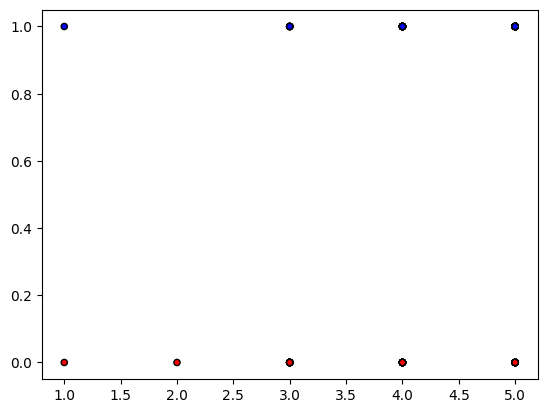

In [27]:
# By dropping some of the features, the accuracy has increased

print(x_train.shape)
print(x_train[0])

print(y_train.shape)
print(y_train)

cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.scatter(x[:, 2], y[:], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [28]:
#Remove all features with > 19% correlation
df_clean = df.drop(columns=['Housing Cost', 'Quality of schools', 'Community trust in local police'])

x = df_clean.loc[:, ['City Services Availability', 'Community Maintenance']].values
y = df_clean.loc[:, 'Unhappy/Happy'].values

# Split the dataframe to training set and dataset.
# Using an 80% - 20% split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [29]:
df_clean

,City Services Availability,Community Maintenance,Availability of Community Room,Unhappy/Happy
0,5,5,3,1
1,5,5,3,0
2,4,4,4,0
3,4,4,5,0
4,3,4,5,1
...,...,...,...,...
134,5,2,4,1
135,4,3,4,1
136,3,2,3,0
137,3,5,5,1


In [30]:
# Make nearest_neighbors class object
nearest_neighbors = KNN(k=5)
nearest_neighbors.fit(x_train, y_train)

my_prediction = nearest_neighbors.predict(x_test)

print(my_prediction)
print(y_test)

[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0]
[1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1]


In [31]:
print (classification_report(y_test, my_prediction))
print (confusion_matrix(y_test, my_prediction))

              precision    recall  f1-score   support

           0       0.36      0.62      0.45         8
           1       0.73      0.47      0.57        17

    accuracy                           0.52        25
   macro avg       0.54      0.55      0.51        25
weighted avg       0.61      0.52      0.53        25

[[5 3]
 [9 8]]


In [32]:
# Test against sklearn
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

print(y_predict)
print(y_test)


print (classification_report(y_test, y_predict))
print (confusion_matrix(y_test, y_predict))

[1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0]
[1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1]
              precision    recall  f1-score   support

           0       0.45      0.62      0.53         8
           1       0.79      0.65      0.71        17

    accuracy                           0.64        25
   macro avg       0.62      0.64      0.62        25
weighted avg       0.68      0.64      0.65        25

[[ 5  3]
 [ 6 11]]


In [33]:
# Scale data and run once more (Use cleaned dataframe)
scale = StandardScaler()
df_scaled = pd.DataFrame(scale.fit_transform(df_clean), columns = df_clean.columns)
df_scaled

,City Services Availability,Community Maintenance,Availability of Community Room,Unhappy/Happy
0,0.862995,1.237179,-1.356294,1.0
1,0.862995,1.237179,-1.356294,-1.0
2,-0.367021,0.384900,-0.212209,-1.0
3,-0.367021,0.384900,0.931875,-1.0
4,-1.597037,0.384900,0.931875,1.0
...,...,...,...,...
119,0.862995,-1.319658,-0.212209,1.0
120,-0.367021,-0.467379,-0.212209,1.0
121,-1.597037,-1.319658,-1.356294,-1.0
122,-1.597037,1.237179,0.931875,1.0


In [34]:
x = df_scaled.loc[:, ['City Services Availability', 'Community Maintenance']].values
y = df_scaled.loc[:, 'Unhappy/Happy'].values

# Split the dataframe to training set and dataset.
# Using an 80% - 20% split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [35]:
# Make nearest_neighbors class object
nearest_neighbors = KNN(k=5)
nearest_neighbors.fit(x_train, y_train)

my_prediction = nearest_neighbors.predict(x_test)

print(my_prediction)
print(y_test)

[1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0]
[-1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
 -1.  1.  1.  1. -1. -1.  1.]


In [36]:
print (classification_report(y_test, my_prediction))
print (confusion_matrix(y_test, my_prediction))

              precision    recall  f1-score   support

        -1.0       0.70      0.50      0.58        14
         1.0       0.53      0.73      0.62        11

    accuracy                           0.60        25
   macro avg       0.62      0.61      0.60        25
weighted avg       0.63      0.60      0.60        25

[[7 7]
 [3 8]]


In [37]:
# Test against sklearn
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)

print(y_predict)
print(y_test)


print (classification_report(y_test, y_predict))
print (confusion_matrix(y_test, y_predict))

[-1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1. -1.
  1.  1.  1.  1.  1.  1. -1.]
[-1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.
 -1.  1.  1.  1. -1. -1.  1.]
              precision    recall  f1-score   support

        -1.0       0.64      0.50      0.56        14
         1.0       0.50      0.64      0.56        11

    accuracy                           0.56        25
   macro avg       0.57      0.57      0.56        25
weighted avg       0.58      0.56      0.56        25

[[7 7]
 [4 7]]


In [38]:
# From the testing, removing all features with a correlation < 19% yeilded the best results, either being just as
# and sometimes more accurate the the KNN function included with sklearn

# Replace x and y with the cleaned dataframe and split
x = df_clean.loc[:, ['City Services Availability', 'Community Maintenance']].values
y = df_clean.loc[:, 'Unhappy/Happy'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Now optimize k value

error_rate = []

for k in range(1, 50):
    knn = KNN(k)
    knn.fit(x_train, y_train)
    predict_k = knn.predict(x_test)
    error_rate.append(np.mean(predict_k != y_test))


Text(0, 0.5, 'Error Rate')

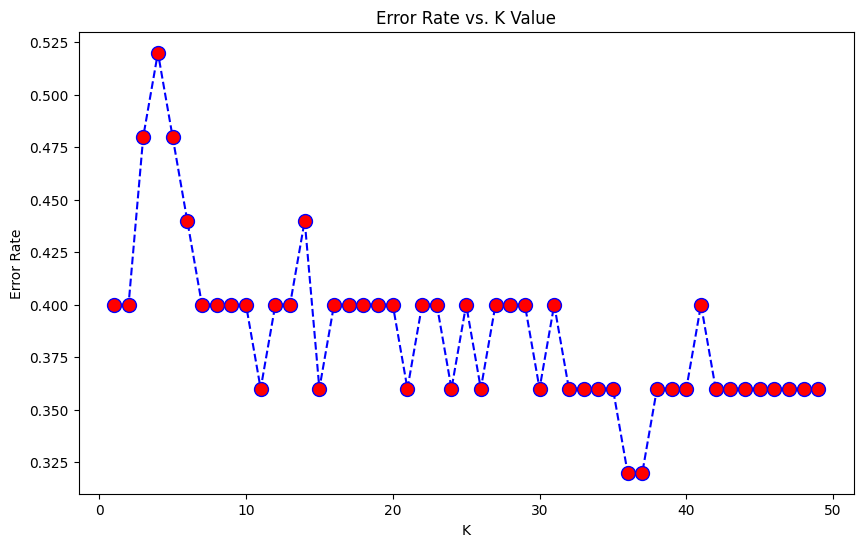

In [39]:
# Plot the error rate as an elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [40]:
# The Lower the point, the lower the rate of error

In [41]:
clf = svm.SVC(kernel='linear', C=1)
cv_scores = cross_val_score(clf, x, y, cv=5)
print(cv_scores)
avg_accuracy = cv_scores.mean()
print(avg_accuracy)

[0.48 0.56 0.8  0.56 0.75]
0.6300000000000001


In [42]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LogisticRegression()
kf_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(kf_scores)

[0.69230769 0.69230769 0.92307692 0.61538462 0.5        0.58333333
 0.58333333 0.66666667 0.83333333 0.5       ]


In [43]:
print(f'Accuracy: {np.mean(kf_scores)} {np.std(kf_scores)}')

Accuracy: 0.6589743589743591 0.1289656927302012


In [44]:
# According to the Accuracies calculated, my KNN algorithm has a similar performace to the sklearn knn algorithm 